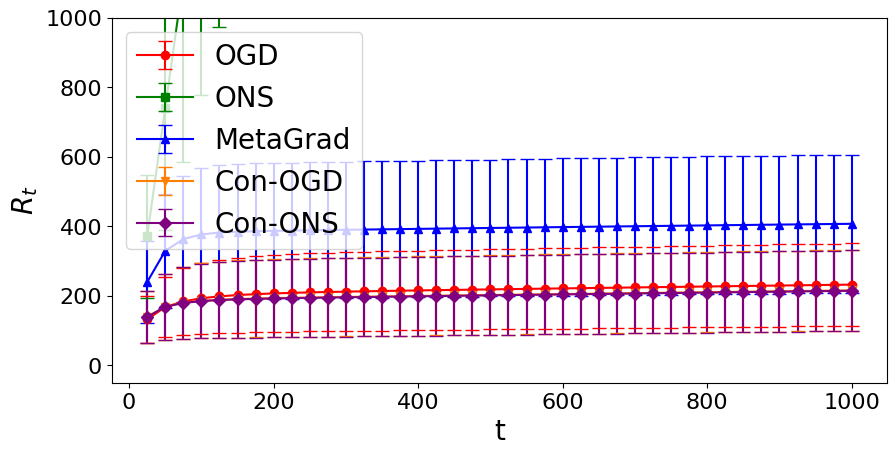

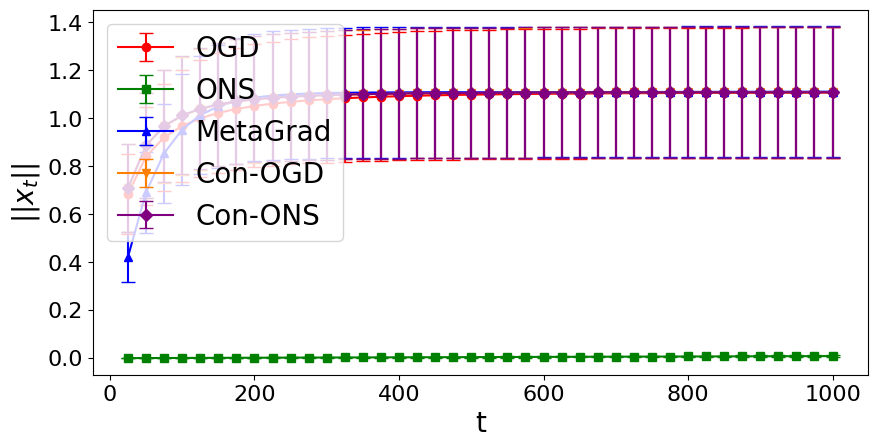

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os

data_num = 2 # 0:Contaminated strongly convex, 1:contaminated exp-concave, 2:Least Mean Square Regression

# parameters for experiments 0 and 1
if data_num == 0 or data_num == 1:
    n = 1 # fixed
    d = 1 # fixed
    T = 1000 # number of rounds
    k = 250 # number of contaminated rounds

# parameters for experiment 2
elif data_num == 2:
    n = 10 # batch size
    d = 5 # dimension
    T = 1000 # number of rounds
    k = 250 # number of contaminated rounds



time = np.arange(1, T + 1)

# read data
if data_num == 0:
    subfolder_name = "ConSC_100"
elif data_num == 1:
    subfolder_name = "ConEC_100"
elif data_num == 2:
    subfolder_name = "LR"

npz_file_name = f'GD_{n}_{T}_{d}_{k}.npz'
file_path = os.path.join(os.getcwd(), subfolder_name, npz_file_name)
data1 = np.load(file_path)
if data_num == 1 or data_num == 2:
    npz_file_name = f'ONS_{n}_{T}_{d}_{k}.npz'
    file_path = os.path.join(os.getcwd(), subfolder_name, npz_file_name)
    data2 = np.load(file_path)
npz_file_name = f'MetaGrad_{n}_{T}_{d}_{k}.npz'
file_path = os.path.join(os.getcwd(), subfolder_name, npz_file_name)
data3 = np.load(file_path)
if data_num == 0 or data_num == 2:
    npz_file_name = f'Con-OGD_{n}_{T}_{d}_{k}.npz'
    file_path = os.path.join(os.getcwd(), subfolder_name, npz_file_name)
    data4 = np.load(file_path)
if data_num == 1 or data_num == 2:
    npz_file_name = f'Con-ONS_{n}_{T}_{d}_{k}.npz'
    file_path = os.path.join(os.getcwd(), subfolder_name, npz_file_name)
    data5 = np.load(file_path)

# indices for plotting
if data_num == 0 or data_num == 1:
    indices = np.where(time % 25 == 0)
elif data_num == 2:
    indices = np.where(time % 25 == 0)

# plot
fig1, ax1 = plt.subplots(figsize=(10, 5))
fig2, ax2 = plt.subplots(figsize=(10, 5))

color_red = (1, 0, 0)
color_green = (0 , 0.5, 0)
color_blue = (0, 0, 1) 
color_yellow = (0.7, 0.7, 0)
color_purple = (0.5, 0, 0.5)
color_orange = (1, 0.5, 0)

ax1.errorbar(time[indices], data1['regret_mean'][indices], yerr=data1['regret_std'][indices], fmt='o-', color=color_red, capsize=5, label='OGD')
ax2.errorbar(time[indices], data1['x_mean'][indices], yerr=data1['x_std'][indices], fmt='o-', color=color_red, capsize=5, label='OGD')
if data_num == 1 or data_num == 2:
    ax1.errorbar(time[indices], data2['regret_mean'][indices], yerr=data2['regret_std'][indices], fmt='s-', color=color_green, capsize=5, label='ONS')
    ax2.errorbar(time[indices], data2['x_mean'][indices], yerr=data2['x_std'][indices], fmt='s-', color=color_green, capsize=5, label='ONS')
ax1.errorbar(time[indices], data3['regret_mean'][indices], yerr=data3['regret_std'][indices], fmt='^-', color=color_blue, capsize=5, label='MetaGrad')
ax2.errorbar(time[indices], data3['x_mean'][indices], yerr=data3['x_std'][indices], fmt='^-', color=color_blue, capsize=5, label='MetaGrad')
if data_num == 0 or data_num == 2:
    ax1.errorbar(time[indices], data4['regret_mean'][indices], yerr=data4['regret_std'][indices], fmt='v-', color=color_orange, capsize=5, label='Con-OGD')
    ax2.errorbar(time[indices], data4['x_mean'][indices], yerr=data4['x_std'][indices], fmt='v-', color=color_orange, capsize=5, label='Con-OGD')
if data_num == 1 or data_num == 2:
    ax1.errorbar(time[indices], data5['regret_mean'][indices], yerr=data5['regret_std'][indices], fmt='D-', color=color_purple, capsize=5, label='Con-ONS')
    ax2.errorbar(time[indices], data5['x_mean'][indices], yerr=data5['x_std'][indices], fmt='D-', color=color_purple, capsize=5, label='Con-ONS')

ax1.set_xlabel('t', fontsize=20)
ax2.set_xlabel('t', fontsize=20)
ax1.set_ylabel('$R_t$', fontsize=20)
if data_num == 0 or data_num == 1:
    ax2.set_ylabel('$x_t$', fontsize=20)
elif data_num == 2:
    ax2.set_ylabel('$||x_t||$', fontsize=20)
ax1.set_ylim([-50,1500])
ax2.set_ylim([0,2.5])
ax1.legend(loc = 'upper left', fontsize=20) 
ax2.legend(loc = 'upper left', fontsize=20) 
ax1.tick_params(axis='both', labelsize=16) 
ax2.tick_params(axis='both', labelsize=16) 
fig1.subplots_adjust(bottom=0.15)
fig2.subplots_adjust(bottom=0.15)

# save the figure
filename_regret = f'{subfolder_name}_regret_{n}_{T}_{d}_{k}.png'
filename_x = f'{subfolder_name}_x_{n}_{T}_{d}_{k}.png'
fig1.figure.savefig(filename_regret)
fig2.figure.savefig(filename_x)

plt.show()
          